In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
from keras.layers import *
from keras.optimizers import Adam

In [0]:
import matplotlib.pyplot as plt

In [0]:

from keras.layers.advanced_activations import LeakyReLU

In [0]:
from keras.models import Sequential, Model

In [0]:
(X_Train,_),(_,_)=mnist.load_data()

In [11]:
print(X_Train.shape)

(60000, 28, 28)


In [12]:
# Normalize

X_Train=(X_Train.astype('float32')-127.5)/127.5                                   #Pixel values are 0-255 255/2 = 127.5
print(np.min(X_Train))
print(np.max(X_Train))


-1.0
1.0


In [13]:
X=X_Train.reshape(-1,28*28)
print(X_Train.shape)

(60000, 28, 28)


In [0]:
EPOCHS=100
BATCH_SIZE=256
NO_OF_BATCHES=int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE=128

NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)


In [15]:
#Generator
generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

# Compile
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W0717 09:34:35.197770 140043598813056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 09:34:35.202486 140043598813056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 09:34:35.208185 140043598813056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 09:34:35.278076 140043598813056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 09:34:35.287477 140043598813056 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
_________________________________________________________________


In [16]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Combined Model (Generator + Discriminator) ->Functional API
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generator_output=generator(gan_input)
gan_output=discriminator(generator_output)

model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 402433    
Total params: 1,888,785
Trainable params: 1,486,352
Non-trainable params: 402,433
_________________________________________________________________


In [0]:
def showImgs(epoch):
  noise=np.random.normal(0,1,size=(100,NOISE_DIM))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(-1,28,28)
  
  #Display the IMAGES
  plt.figure(figsize=(10,10))
  for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[1],cmap='gray',interpolation='nearest')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig("images/gan_output_{0}.png".format(epoch+1))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 LOSS 164.3319 G loss 195.5904 


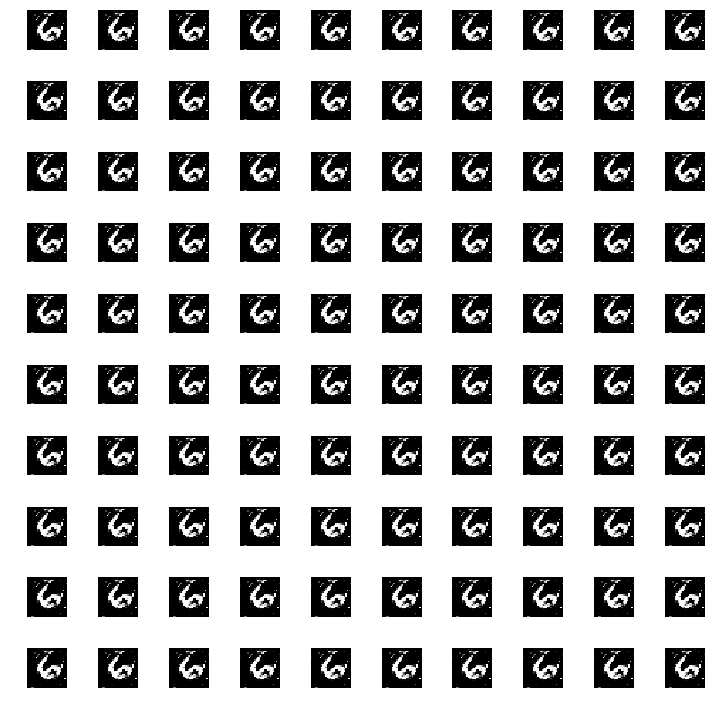

Epoch 2 LOSS 164.3749 G loss 194.1375 
Epoch 3 LOSS 164.3540 G loss 193.3239 
Epoch 4 LOSS 164.1218 G loss 193.5352 
Epoch 5 LOSS 164.0917 G loss 193.1325 
Epoch 6 LOSS 163.9224 G loss 193.5010 


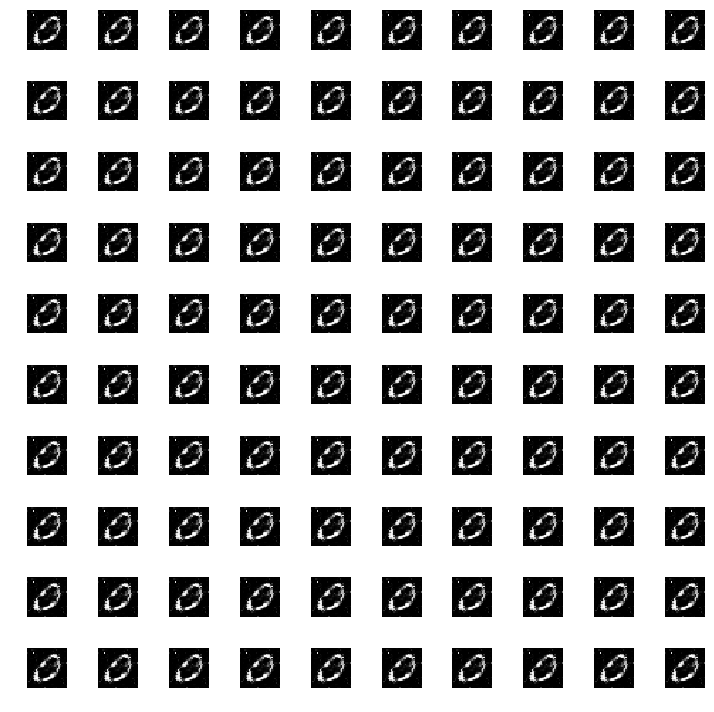

Epoch 7 LOSS 163.8522 G loss 193.1888 
Epoch 8 LOSS 163.5492 G loss 193.9827 
Epoch 9 LOSS 163.6149 G loss 193.1265 
Epoch 10 LOSS 163.5901 G loss 191.9569 
Epoch 11 LOSS 163.5666 G loss 193.0224 


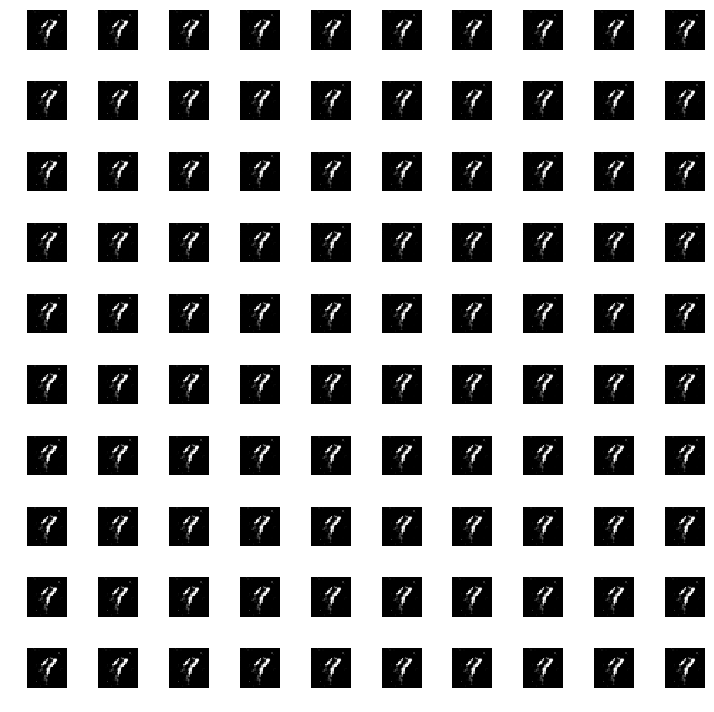

Epoch 12 LOSS 163.3616 G loss 192.1450 
Epoch 13 LOSS 163.2779 G loss 191.8967 
Epoch 14 LOSS 163.3051 G loss 191.9059 
Epoch 15 LOSS 163.1053 G loss 192.3707 
Epoch 16 LOSS 162.9510 G loss 192.9966 


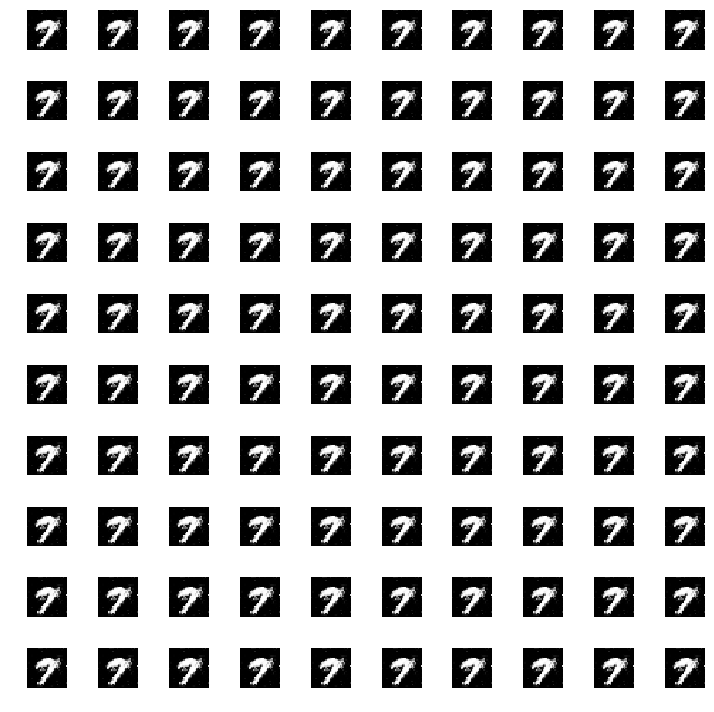

Epoch 17 LOSS 163.0743 G loss 191.1659 
Epoch 18 LOSS 162.9444 G loss 191.1268 
Epoch 19 LOSS 163.0420 G loss 191.0050 
Epoch 20 LOSS 162.8282 G loss 191.2633 
Epoch 21 LOSS 162.7891 G loss 191.3841 


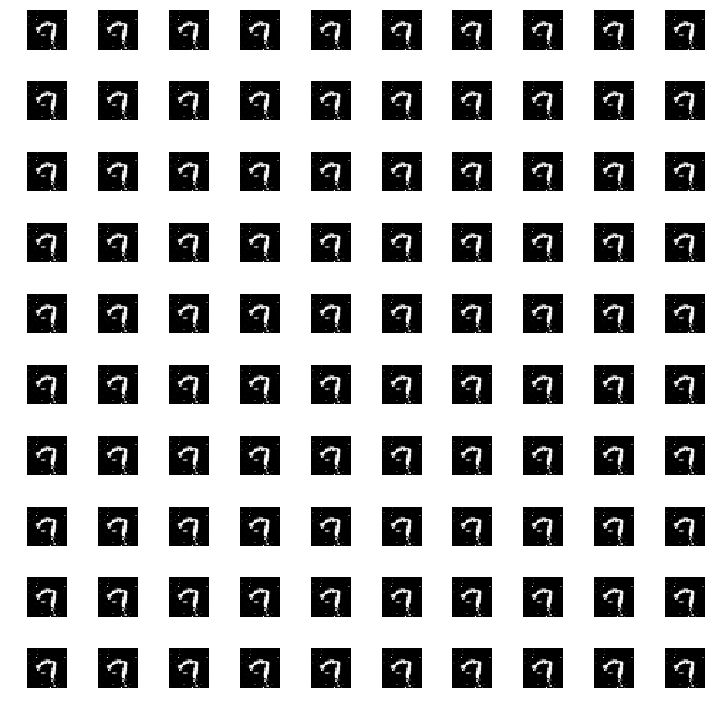

Epoch 22 LOSS 162.6055 G loss 192.4063 
Epoch 23 LOSS 162.6791 G loss 191.1921 
Epoch 24 LOSS 162.6589 G loss 190.8846 
Epoch 25 LOSS 162.6738 G loss 190.7505 
Epoch 26 LOSS 162.6092 G loss 190.7473 


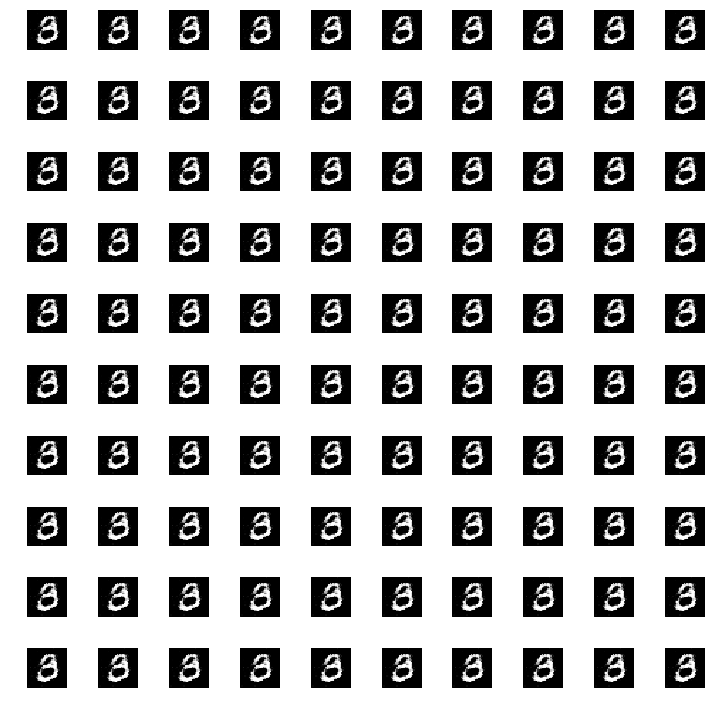

Epoch 27 LOSS 162.5049 G loss 190.7411 
Epoch 28 LOSS 162.5037 G loss 190.7949 
Epoch 29 LOSS 162.4877 G loss 190.6344 
Epoch 30 LOSS 162.4207 G loss 190.2417 
Epoch 31 LOSS 162.4073 G loss 190.3241 


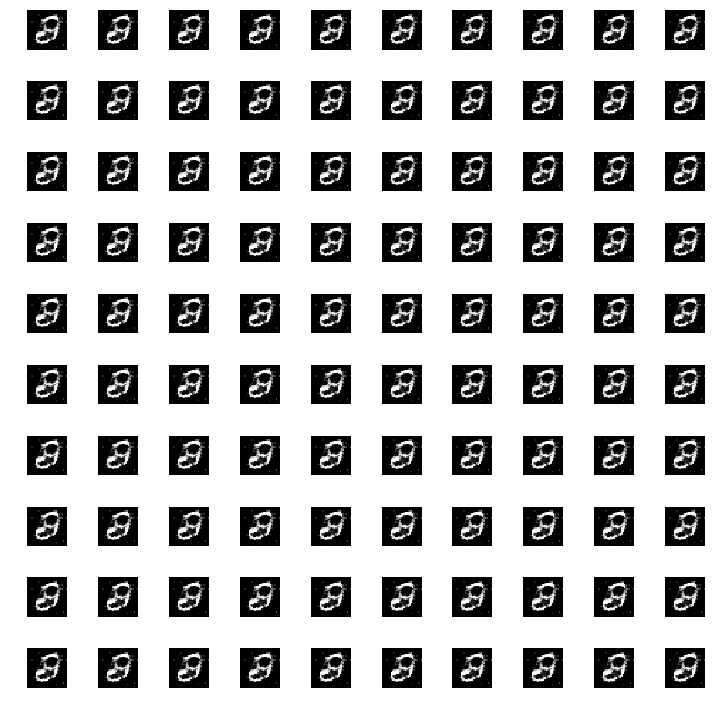

Epoch 32 LOSS 162.2717 G loss 190.8222 
Epoch 33 LOSS 162.2696 G loss 191.3956 
Epoch 34 LOSS 162.2229 G loss 190.6356 
Epoch 35 LOSS 162.1983 G loss 190.7451 
Epoch 36 LOSS 162.2132 G loss 190.7228 


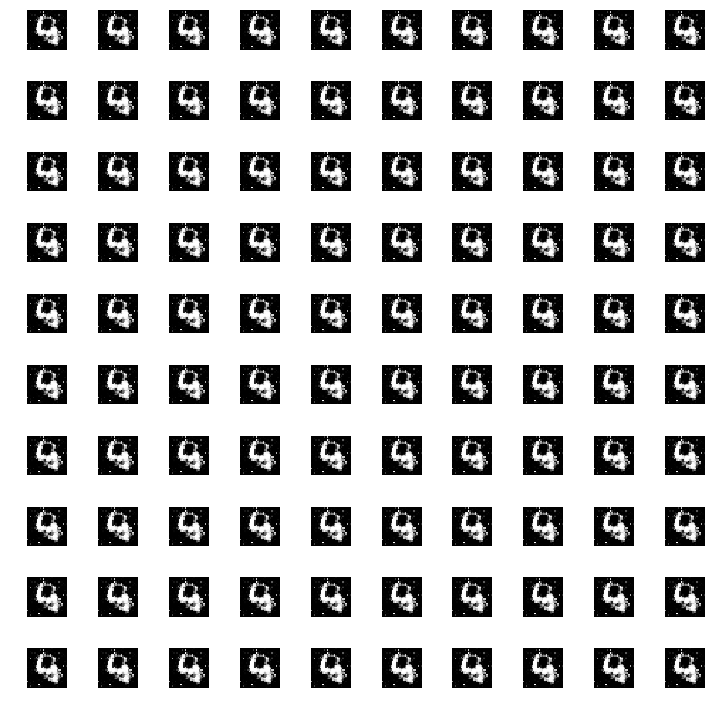

Epoch 37 LOSS 162.1871 G loss 190.2744 
Epoch 38 LOSS 162.1433 G loss 189.8599 
Epoch 39 LOSS 162.1957 G loss 189.6526 
Epoch 40 LOSS 162.0411 G loss 190.4544 
Epoch 41 LOSS 162.0435 G loss 190.2269 


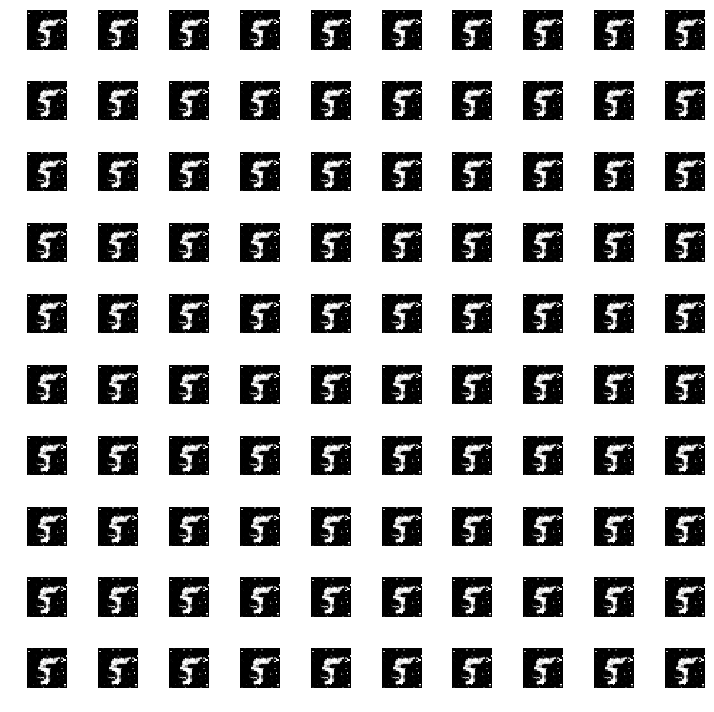

Epoch 42 LOSS 162.0752 G loss 189.6645 
Epoch 43 LOSS 161.9972 G loss 190.3883 
Epoch 44 LOSS 162.0001 G loss 190.1358 
Epoch 45 LOSS 161.9979 G loss 190.3715 
Epoch 46 LOSS 161.9496 G loss 190.0151 


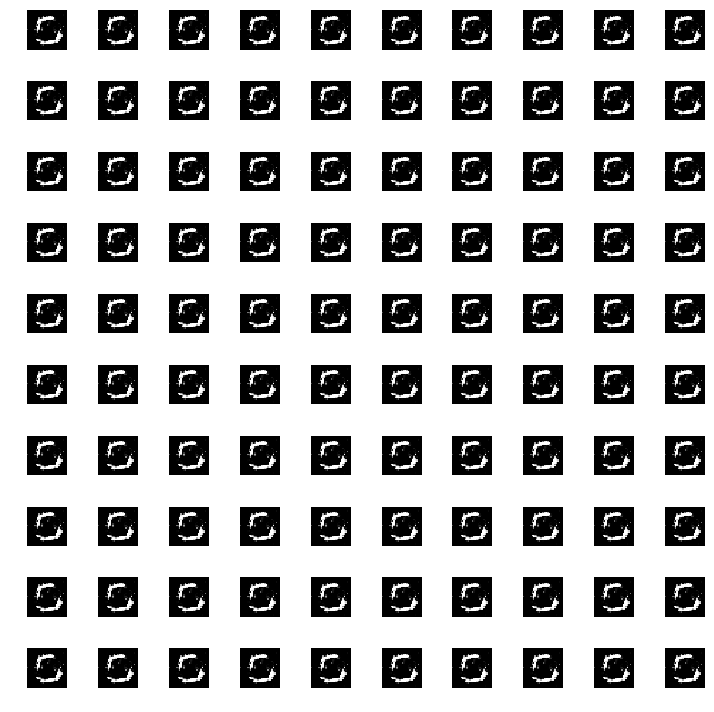

Epoch 47 LOSS 161.9651 G loss 190.4394 
Epoch 48 LOSS 161.9302 G loss 190.5177 
Epoch 49 LOSS 161.9018 G loss 190.4635 
Epoch 50 LOSS 161.8924 G loss 190.0955 
Epoch 51 LOSS 161.8441 G loss 190.2383 


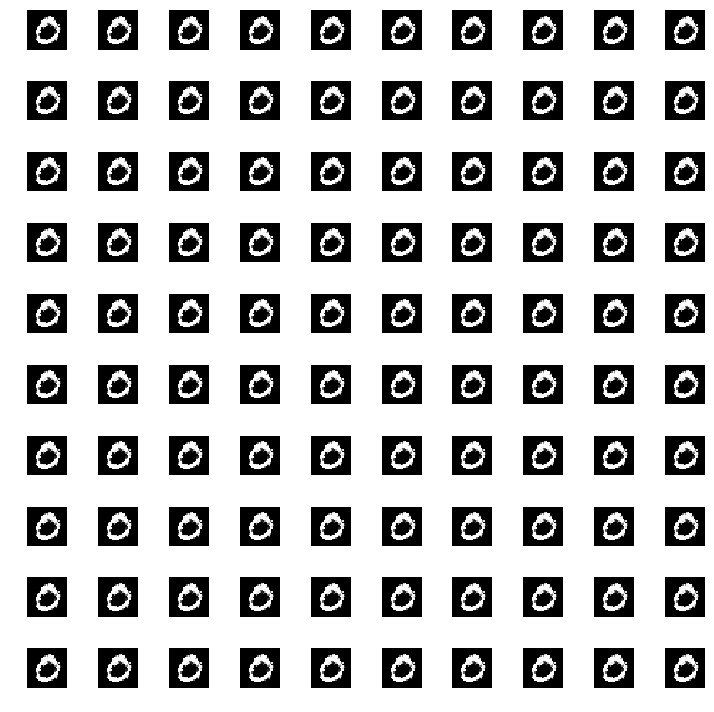

Epoch 52 LOSS 161.8316 G loss 190.0106 
Epoch 53 LOSS 161.8649 G loss 189.3153 
Epoch 54 LOSS 161.8189 G loss 189.8785 
Epoch 55 LOSS 161.7527 G loss 189.9875 
Epoch 56 LOSS 161.7954 G loss 190.0274 


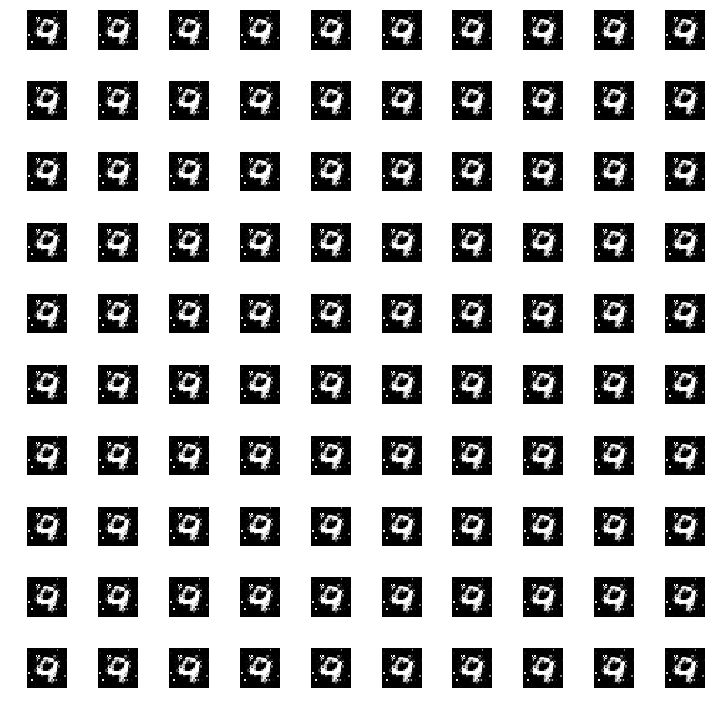

Epoch 57 LOSS 161.7606 G loss 190.0736 
Epoch 58 LOSS 161.7561 G loss 189.7505 
Epoch 59 LOSS 161.7713 G loss 189.7325 
Epoch 60 LOSS 161.7044 G loss 190.3680 
Epoch 61 LOSS 161.7404 G loss 190.0622 


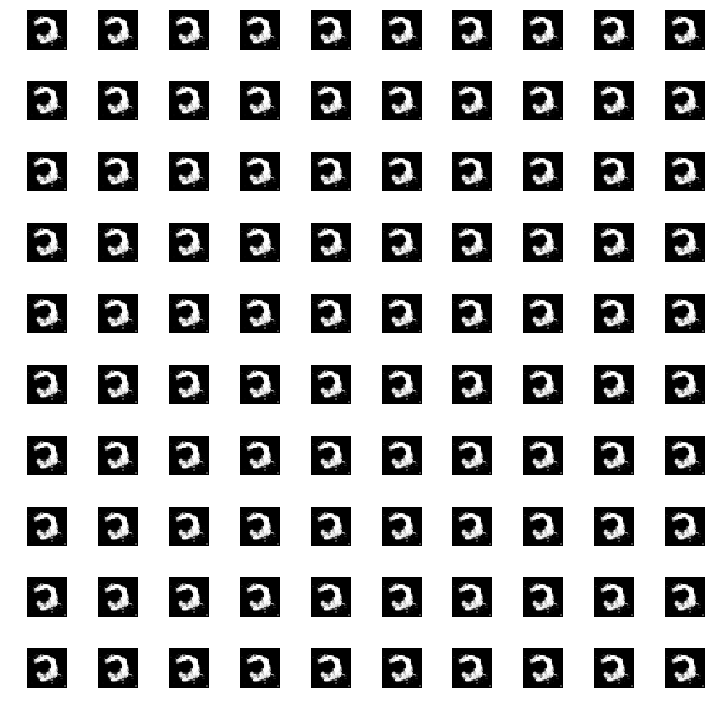

Epoch 62 LOSS 161.7096 G loss 190.0205 
Epoch 63 LOSS 161.7404 G loss 189.6223 
Epoch 64 LOSS 161.6888 G loss 189.8412 
Epoch 65 LOSS 161.6901 G loss 189.8952 
Epoch 66 LOSS 161.6887 G loss 190.0618 


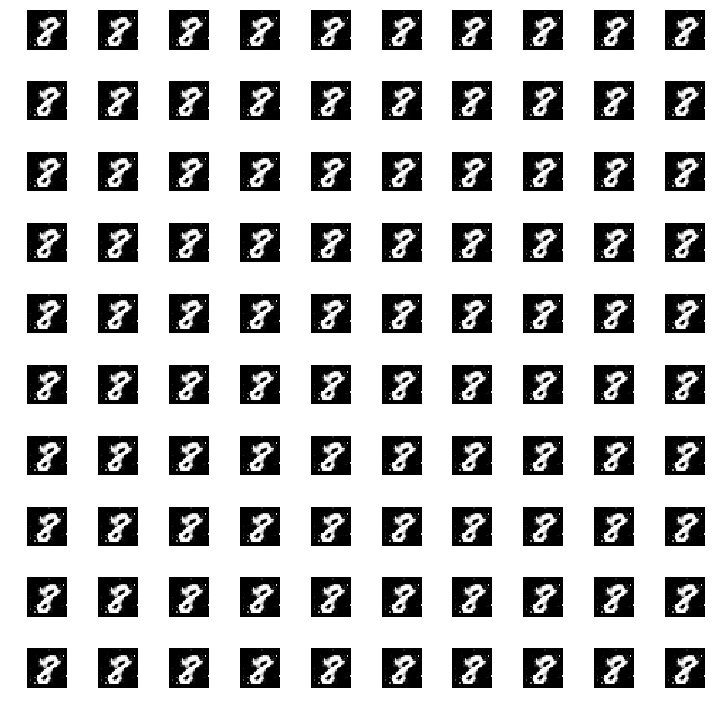

Epoch 67 LOSS 161.6765 G loss 190.1200 
Epoch 68 LOSS 161.6510 G loss 190.2695 
Epoch 69 LOSS 161.6451 G loss 189.6843 
Epoch 70 LOSS 161.6517 G loss 189.6178 
Epoch 71 LOSS 161.6797 G loss 189.7590 


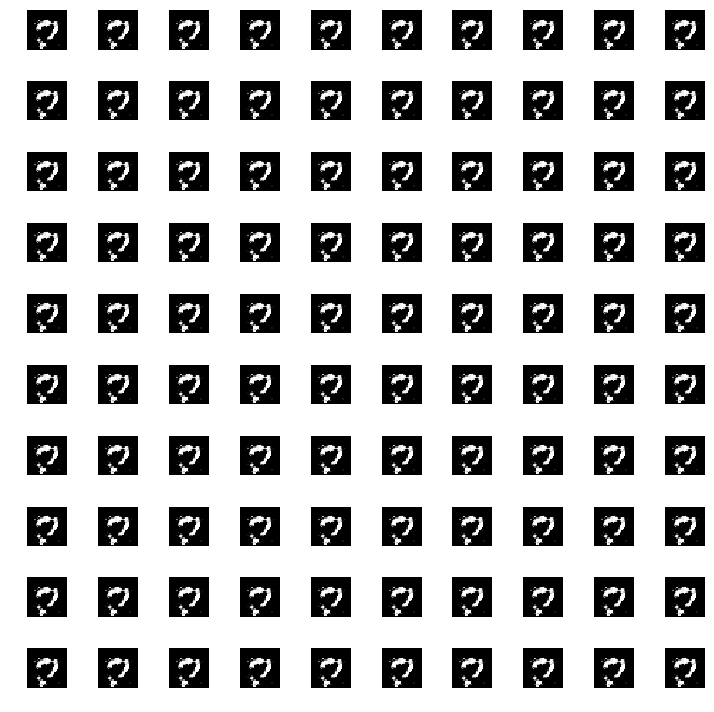

Epoch 72 LOSS 161.6163 G loss 189.6612 
Epoch 73 LOSS 161.6453 G loss 190.0021 
Epoch 74 LOSS 161.6441 G loss 189.7627 
Epoch 75 LOSS 161.6274 G loss 189.9832 
Epoch 76 LOSS 161.6211 G loss 189.9720 


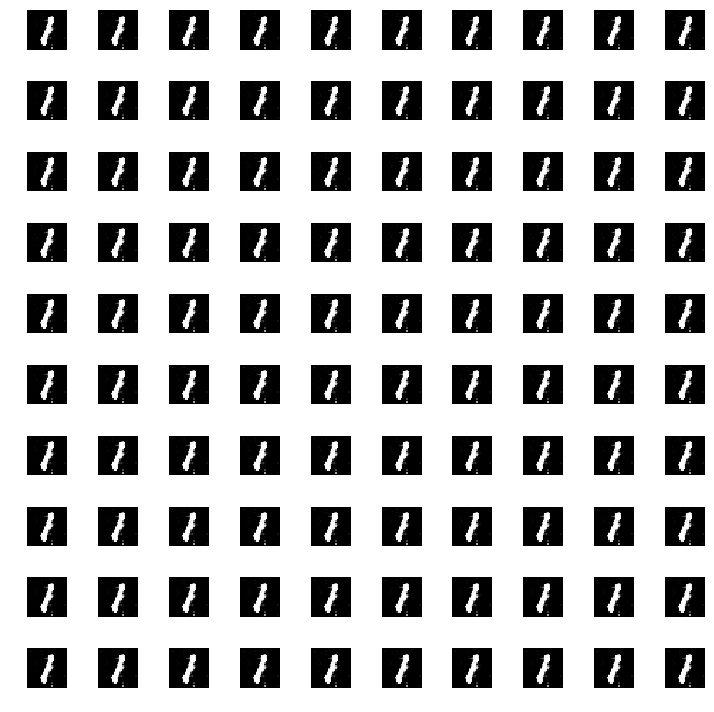

Epoch 77 LOSS 161.6265 G loss 189.5579 
Epoch 78 LOSS 161.6120 G loss 189.7331 
Epoch 79 LOSS 161.5786 G loss 189.6839 
Epoch 80 LOSS 161.5787 G loss 189.8479 
Epoch 81 LOSS 161.6168 G loss 189.5281 


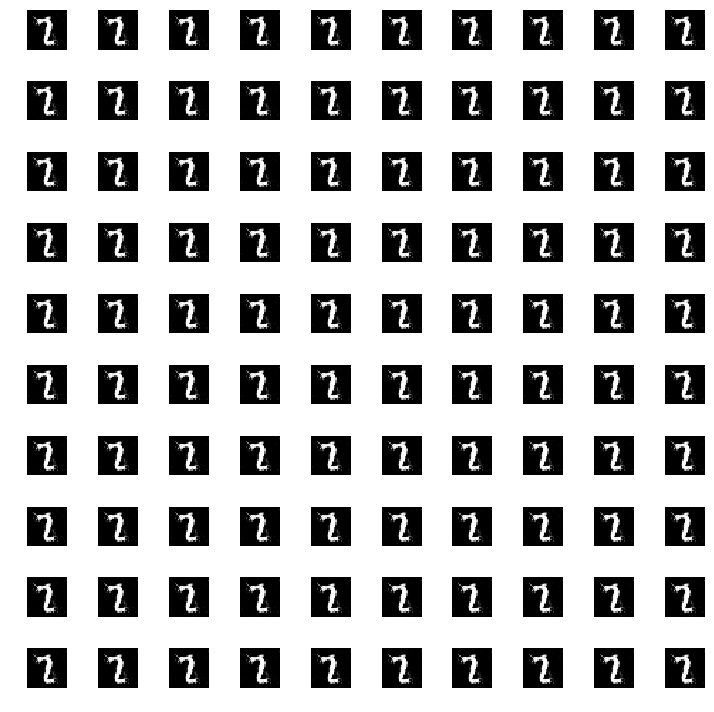

Epoch 82 LOSS 161.5992 G loss 190.0287 
Epoch 83 LOSS 161.6190 G loss 189.7449 
Epoch 84 LOSS 161.6041 G loss 190.0011 
Epoch 85 LOSS 161.5927 G loss 190.1828 
Epoch 86 LOSS 161.5610 G loss 190.1433 


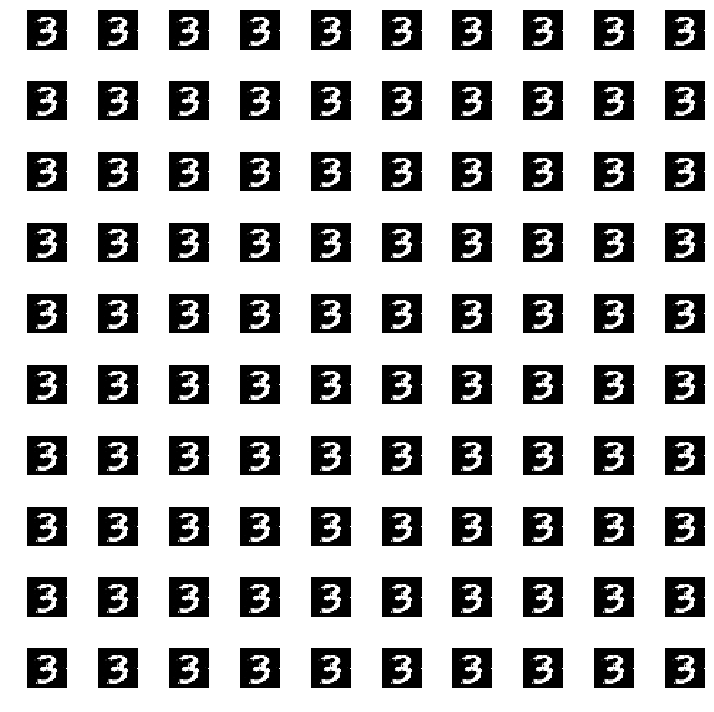

Epoch 87 LOSS 161.6025 G loss 189.8380 
Epoch 88 LOSS 161.5862 G loss 189.8273 
Epoch 89 LOSS 161.5797 G loss 189.5849 
Epoch 90 LOSS 161.6038 G loss 189.5448 
Epoch 91 LOSS 161.5609 G loss 189.8569 


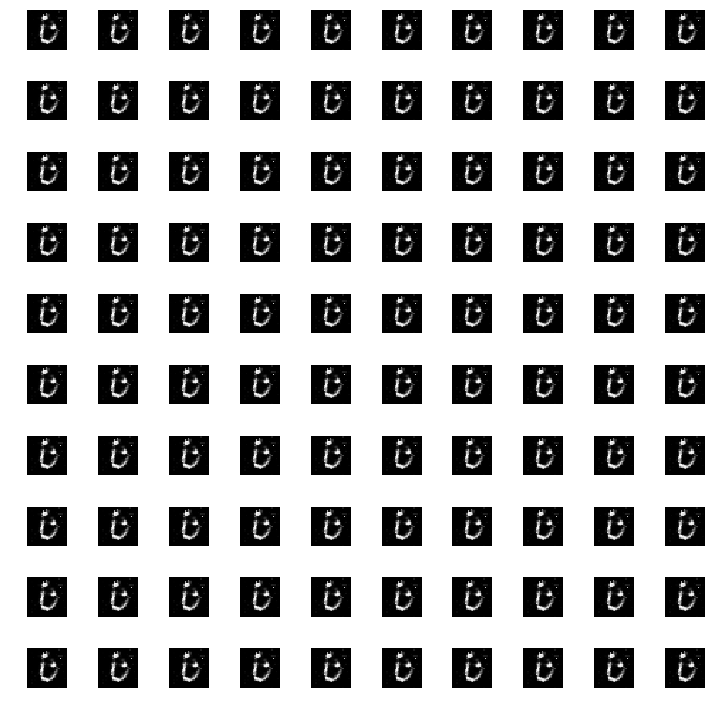

Epoch 92 LOSS 161.6162 G loss 190.4969 
Epoch 93 LOSS 161.5835 G loss 190.1897 
Epoch 94 LOSS 161.5529 G loss 190.0635 
Epoch 95 LOSS 161.5226 G loss 190.2173 
Epoch 96 LOSS 161.5876 G loss 189.9976 


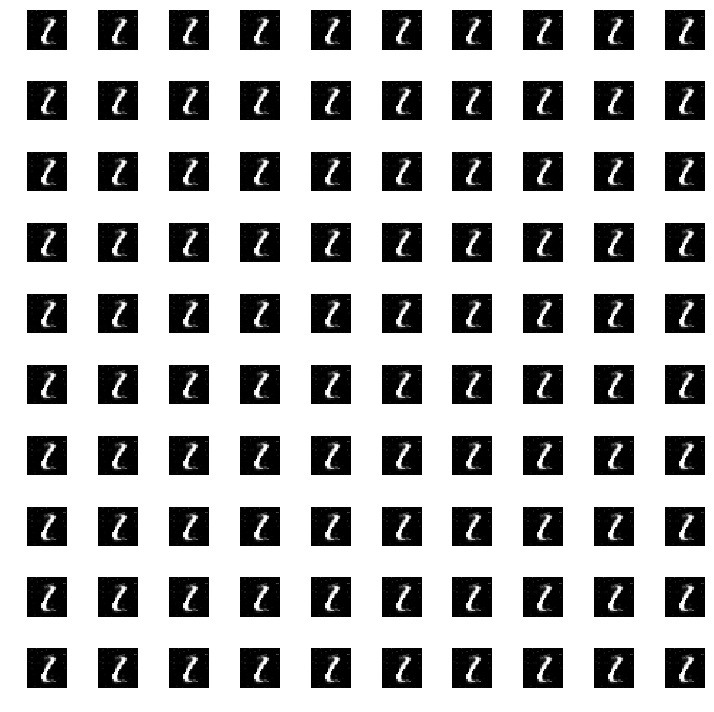

Epoch 97 LOSS 161.5805 G loss 189.2883 
Epoch 98 LOSS 161.5284 G loss 189.6125 
Epoch 99 LOSS 161.5377 G loss 190.5737 
Epoch 100 LOSS 161.5495 G loss 189.7777 


In [25]:

d_losses=[]
g_losses=[]



#Training Loop
for epoch in range(EPOCHS):
  epoch_d_loss=0.0
  epoch_g_loss=0.0
  
  #Mini Batch
  for step in range(NO_OF_BATCHES):
    idx=np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
    real_imgs=X[idx]
    
    # generate fake images assuming generator is frozen
    noise=np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs=generator.predict(noise)
    
    #Labels
    real_y=np.ones((HALF_BATCH_SIZE,1))*0.9                         #Smoothing
    fake_y=np.zeros((HALF_BATCH_SIZE,1))
    
    #Train on Real and Fake images
    
    d_real_loss=discriminator.train_on_batch(real_imgs,real_y)
    d_fake_loss=discriminator.train_on_batch(fake_imgs,fake_y)
    
    d_loss=0.5*d_real_loss + 0.5*d_fake_loss
    epoch_d_loss+=d_loss
    
    #Train Generator
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    real_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,real_y)
    epoch_g_loss+=g_loss
  d_losses.append(epoch_d_loss)
  g_losses.append(epoch_g_loss)
  
  print("Epoch %d LOSS %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
  if (epoch%5)==0:
    generator.save("model/gen_{0}.h5".format(epoch))
    
    showImgs(epoch)

In [20]:
!ls

images	model  sample_data


In [21]:
!mkdir images
!mkdir model

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘model’: File exists


In [22]:
ls

images/  model/  sample_data/


In [27]:
!zip -r images.zip model sample_data

updating: model/ (stored 0%)
updating: model/gen_10.h5 (deflated 8%)
updating: model/gen_25.h5 (deflated 8%)
updating: model/gen_30.h5 (deflated 7%)
updating: model/gen_40.h5 (deflated 7%)
updating: model/gen_0.h5 (deflated 8%)
updating: model/gen_50.h5 (deflated 7%)
updating: model/gen_5.h5 (deflated 8%)
updating: model/gen_45.h5 (deflated 7%)
updating: model/gen_35.h5 (deflated 8%)
updating: model/gen_20.h5 (deflated 8%)
updating: model/gen_55.h5 (deflated 7%)
updating: model/gen_15.h5 (deflated 8%)
updating: sample_data/ (stored 0%)
updating: sample_data/README.md (deflated 42%)
updating: sample_data/anscombe.json (deflated 83%)
updating: sample_data/california_housing_test.csv (deflated 76%)
updating: sample_data/mnist_test.csv (deflated 88%)
updating: sample_data/mnist_train_small.csv (deflated 88%)
updating: sample_data/california_housing_train.csv (deflated 79%)
  adding: model/gen_70.h5 (deflated 7%)
  adding: model/gen_85.h5 (deflated 7%)
  adding: model/gen_80.h5 (deflated 7%

In [26]:
from google.colab import files
files.download('images.zip') 

KeyboardInterrupt: ignored